In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
import datetime

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2024, 12, 31)


In [35]:
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-01-02,17.215366,17.336748,17.180820,17.294732,234684800
2014-01-03,16.837215,17.233106,16.820097,17.206963,392467600
2014-01-06,16.929039,17.018363,16.607532,16.727359,412610800
2014-01-07,16.807964,16.992215,16.741983,16.941173,317209200
2014-01-08,16.914408,16.979766,16.765949,16.769682,258529600


In [36]:
df.reset_index(inplace=True)

df = df.drop(columns=['Date'])
df.head()


<ipython-input-36-413cf3274275>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns=['Date'])


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,17.215366,17.336748,17.180820,17.294732,234684800
1,16.837215,17.233106,16.820097,17.206963,392467600
2,16.929039,17.018363,16.607532,16.727359,412610800
3,16.807964,16.992215,16.741983,16.941173,317209200
4,16.914408,16.979766,16.765949,16.769682,258529600


In [37]:
MA100 = df.Close.rolling(100).mean()
MA100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2762,228.969606
2763,229.357535
2764,229.859200
2765,230.346935


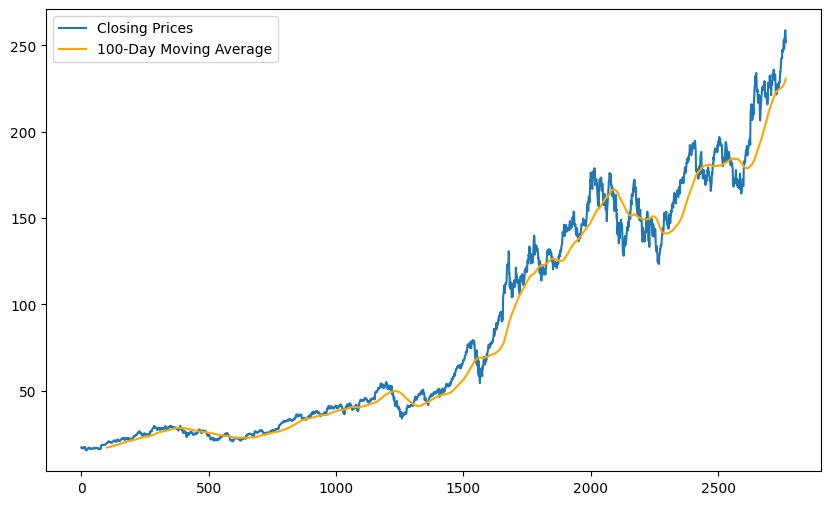

In [38]:
plt.figure(figsize=(10,6))
plt.plot(df.Close, label='Closing Prices')
plt.plot(MA100, label='100-Day Moving Average', color='orange')
plt.legend()
plt.show()


In [39]:
MA200 = df.Close.rolling(200).mean()
MA200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2762,210.752679
2763,211.182570
2764,211.614168
2765,212.039086


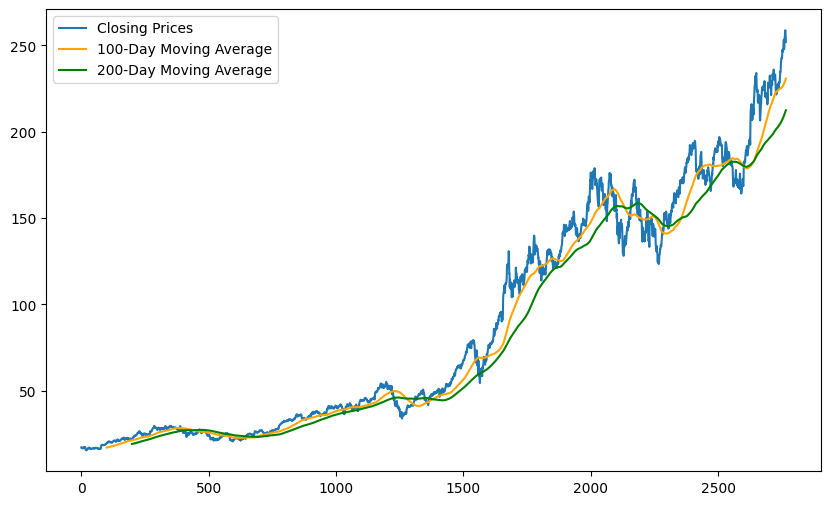

In [40]:
MA100 = df.Close.rolling(100).mean()
MA100

plt.figure(figsize=(10,6))
plt.plot(df.Close, label='Closing Prices')
plt.plot(MA100, label='100-Day Moving Average', color='orange')
plt.plot(MA200, label='200-Day Moving Average', color='green')
plt.legend()
plt.show()


In [48]:
#Training and Testing of data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1936, 1)
(831, 1)


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [50]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01201337],
       [0.00927743],
       [0.00994178],
       ...,
       [1.        ],
       [0.98878145],
       [0.98139725]])

In [51]:
x_train =[]
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)




In [52]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [53]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 251ms/step - loss: 0.0569
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 252ms/step - loss: 0.0102
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 250ms/step - loss: 0.0065
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - loss: 0.0063
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - loss: 0.0049
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 250ms/step - loss: 0.0046
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 264ms/step - loss: 0.0052
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - loss: 0.0040
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - loss: 0.0042
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 251ms/step - loss: 0.0043
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - loss: 0.0046
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - loss: 0.0037
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - loss: 0.0038
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 257ms/step - loss: 0.0039
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [ ]:
model.save('keras_model.h5')

In [57]:
last_100_days = data_training.tail(100)
final_model = pd.concat([last_100_days, data_testing], ignore_index=True)
final_model

Ticker,AAPL
0,130.213608
1,130.595154
2,129.069077
3,131.397278
4,131.788620
...,...
926,254.989655
927,257.916443
928,258.735504
929,255.309296


In [58]:
input_data = scaler.fit_transform(final_model)
input_data

array([[0.07159428],
       [0.07435046],
       [0.06332651],
       [0.08014477],
       [0.08297172],
       [0.08063979],
       [0.07491558],
       [0.07420893],
       [0.05993466],
       [0.06756632],
       [0.03442437],
       [0.03619105],
       [0.04778007],
       [0.0526641 ],
       [0.02888043],
       [0.02222668],
       [0.        ],
       [0.01557283],
       [0.0331274 ],
       [0.02477481],
       [0.01472333],
       [0.01359082],
       [0.03213642],
       [0.01882883],
       [0.03064998],
       [0.02923436],
       [0.02888043],
       [0.01776714],
       [0.01302459],
       [0.01068864],
       [0.01620982],
       [0.00545052],
       [0.02208499],
       [0.02215586],
       [0.02810174],
       [0.03086238],
       [0.02364231],
       [0.0324197 ],
       [0.05457551],
       [0.04862974],
       [0.05223956],
       [0.06384831],
       [0.05443393],
       [0.0674583 ],
       [0.07935038],
       [0.07736831],
       [0.07531581],
       [0.073

In [59]:
#Testing
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])



In [60]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [61]:
#Predictions
y_predictions = model.predict(x_test)
y_predictions.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step


(831, 1)

In [62]:
value = scaler.scale_[0]

scaler_factor = 1/value
y_predictions = y_predictions * scaler_factor
y_test = y_test * scaler_factor

0.007223716354939799

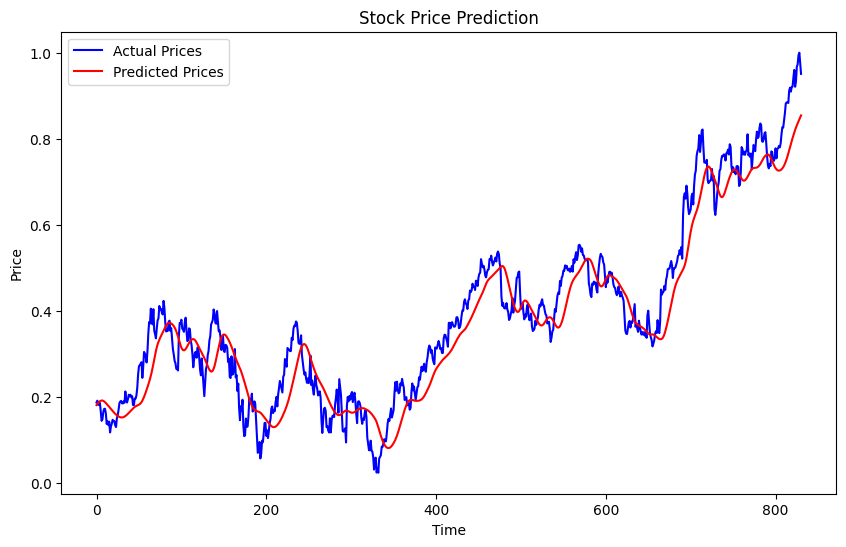

In [63]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_predictions, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()